In [ ]:
!pip install statsmodels openpyxl -U -q

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os


In [ ]:
# Load the dataset
a1 = pd.read_excel("/content/case_study1.xlsx")
a2 = pd.read_excel("/content/case_study2.xlsx")

In [ ]:
df1 = a1.copy()
df2 = a2.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [ ]:
df1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,...,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,...,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,...,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,...,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [ ]:
df2.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,...,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,...,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.000000
50%,25668.500000,70.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,680.000000
75%,38502.250000,161.000000,8.000000,3.000000,1.000000,15.000000,10.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.164250,1.000000,0.000000,691.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,173800.000000,1.000000,1.000000,811.000000


In [ ]:
df1.isna().sum()

,0
PROSPECTID,0
Total_TL,0
Tot_Closed_TL,0
Tot_Active_TL,0
Total_TL_opened_L6M,0
Tot_TL_closed_L6M,0
pct_tl_open_L6M,0
pct_tl_closed_L6M,0
pct_active_tl,0
pct_closed_tl,0


In [ ]:
df2.isna().sum()

,0
PROSPECTID,0
time_since_recent_payment,0
time_since_first_deliquency,0
time_since_recent_deliquency,0
num_times_delinquent,0
...,...
GL_Flag,0
last_prod_enq2,0
first_prod_enq2,0
Credit_Score,0


In [ ]:
df1.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL'],
      dtype='object')

In [ ]:
df1[df1['Age_Oldest_TL'] != -99999].count() # 51296 number of rows have non -99999 value.

,0
PROSPECTID,51296
Total_TL,51296
Tot_Closed_TL,51296
Tot_Active_TL,51296
Total_TL_opened_L6M,51296
Tot_TL_closed_L6M,51296
pct_tl_open_L6M,51296
pct_tl_closed_L6M,51296
pct_active_tl,51296
pct_closed_tl,51296


In [ ]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [ ]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)


In [ ]:
df2.columns

Index(['PROSPECTID', 'time_since_recent_payment',
       'time_since_first_deliquency', 'time_since_recent_deliquency',
       'num_times_delinquent', 'max_delinquency_level',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'max_deliq_6mts', 'max_deliq_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq', 'CC_enq',
       'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Fla

In [ ]:
df2 = df2.drop(columns_to_be_removed, axis =1)

for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [ ]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [ ]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [ ]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [ ]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [ ]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

Here's a compact table comparing sequential and parallel VIF calculation:

| Aspect | Sequential VIF | Parallel VIF |
|--------|----------------|--------------|
| Execution | One predictor at a time | Multiple predictors simultaneously |
| Speed | Slower, especially for large datasets | Faster, leverages multi-core processing |
| Resource Use | Less intensive | More intensive, utilizes multiple cores |
| Implementation | Simpler | More complex, may require specialized libraries |
| Scalability | Limited for large datasets | Better for large datasets or many predictors |
| Calculation Method | Same mathematical formula | Same mathematical formula |
| Result Interpretation | No difference | No difference |



**Here we are doing sequential VIF.
On ruuning sequential VIF, the number of columns drop from 72 to 39.
In case of parallel, its 37.**

In [ ]:
for i in range (0,total_columns):

    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)


    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1

    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000327
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646723
3 --- 5.581352009642766
4 --- 1.9855843530987776


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.064658415523423
8 --- 2.898639771299253
9 --- 4.377876915347322
10 --- 2.207853583695844
11 --- 4.916914200506861
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427238
15 --- 1.4210050015175735
16 --- 8.083255010190316
16 --- 1.624122752404011
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.8258570471324318
18 --- 1.5080839450032664
19 --- 2.1720888348245753
20 --- 2.623397553527229
21 --- 2.2959970812106167
22 --- 7.360578319196439
22 --- 2.1602387773102554
23 --- 2.8686288267891444
24 --- 6.458218003637272
24 --- 2.847411886563824
25 --- 4.75319815628408
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808678
26 --- 2.3804746142952666
27 --- 8.609513476514548
27 --- 13.06755093547673
27 --- 3.500040056654653
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512915
31 --- 3.424171203217697
32 --- 10.175021454450922
32 --- 6.408710354561292
32 --- 1.001151196262563
33 --- 3.069197305397274
34 --- 2.8091261600643707
35 --- 20.249538381980678
35 --- 15.864576541593745
35 --- 1.8331649740532

In [ ]:
# check Anova for columns_to_be_kept

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [ ]:
len(columns_to_be_kept_numerical)

37

 **After applying ANOVA, we have 37 column**.

In [ ]:
f_statistic

np.float64(507.29276705297787)

In [ ]:
p_value

np.float64(5e-324)

In [ ]:

# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [ ]:
# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

df['MARITALSTATUS'].unique()
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()


array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [ ]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3


# Others has to be verified by the business end user




df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [ ]:
df['EDUCATION'].value_counts()
df['EDUCATION'] = df['EDUCATION'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

In [ ]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

df_encoded.info()
k = df_encoded.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [ ]:
# Machine Learing model fitting

# Data processing
# 1. Random Forest
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()




Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469202

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.856907593778591

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



In [ ]:
!pip install xgboost -U -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 5.3 MB/s eta 0:00:00


In [ ]:
# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)




xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()





Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796




1. **XGBoost Classifier**:
    - XGBoost (Extreme Gradient Boosting) is a popular gradient boosting algorithm used for classification and regression tasks.
    - In this code snippet:
        - An XGBoost classifier is created using `xgb.XGBClassifier()`.
        - The `objective` parameter is set to `'multi:softmax'`, indicating a multi-class classification problem.
        - The `num_class` parameter is set to 4, representing the number of classes (p1, p2, p3, and p4).
    - The classifier is trained on the training data using `xgb_classifier.fit(x_train, y_train)`.

2. **Predictions and Evaluation**:
    - Predictions are made on the testing data using `y_pred = xgb_classifier.predict(x_test)`.
    - The accuracy of the model is calculated using `accuracy_score(y_test, y_pred)`.
    - Precision, recall, and F1-score are computed for each class using `precision_recall_fscore_support`.

In [ ]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()



Accuracy: 0.71

Class p1:
Precision: 0.7240356083086054
Recall: 0.7218934911242604
F1 Score: 0.7229629629629629

Class p2:
Precision: 0.8094035360404119
Recall: 0.8257680872150645
F1 Score: 0.8175039246467818

Class p3:
Precision: 0.3392
Recall: 0.32
F1 Score: 0.32932038834951455

Class p4:
Precision: 0.6487562189054726
Recall: 0.6336248785228377
F1 Score: 0.6411012782694199



- **Xgboost is giving me best results. So We will further finetune it  and apply standard scaler.**

In [ ]:

from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column



import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78
Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



- **No improvement in metrices**
- **So now we will do Hyperparameter tuning**

In [ ]:

# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.7811719957209081


- **Best Hyperparameters: ('learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200)**

- **Test Accuracy: 0.781**


- **Based on risk appetite of the bank, you will suggest P1,P2,P3,P4 to the business end user**


**Hyperparameter Sensitivity Analysis GridSearchCV**

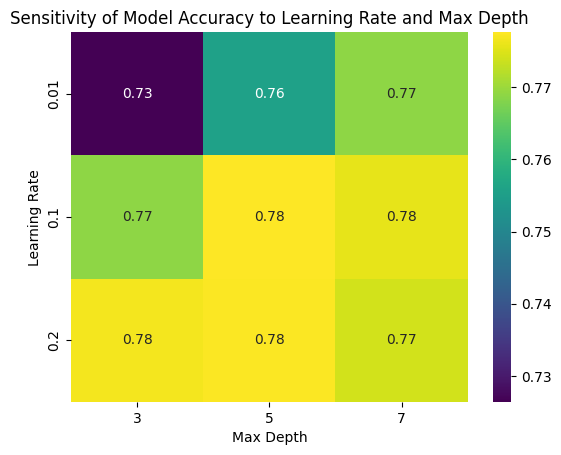

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the grid search results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plot heatmaps or line plots to see how the model accuracy changes with different hyperparameters
# Example: Plotting the relationship between learning rate and accuracy

pivot_table = results.pivot_table(values='mean_test_score', index='param_learning_rate', columns='param_max_depth')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Sensitivity of Model Accuracy to Learning Rate and Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)

# Best parameters and test accuracy
print("Best Hyperparameters:", random_search.best_params_)
best_model = random_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Best Hyperparameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.5}
Test Accuracy: 0.78


In [ ]:
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7812


**Best Hyperparameters:** **{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.5}**

**Test Accuracy:** **0.78**

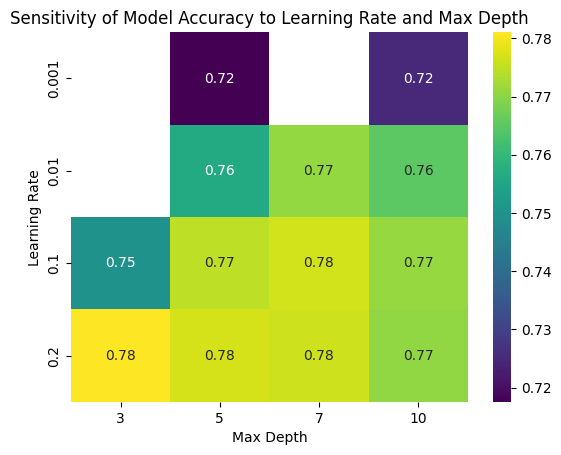

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the random_search results into a DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Plot heatmaps or line plots to see how the model accuracy changes with different hyperparameters
# Example: Plotting the relationship between learning rate and accuracy

pivot_table = results.pivot_table(values='mean_test_score', index='param_learning_rate', columns='param_max_depth')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Sensitivity of Model Accuracy to Learning Rate and Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')
plt.show()


**3. Bayesian Optimization (Using Hyperopt)** :
Bayesian optimization uses probabilistic models to find the best set of hyperparameters more efficiently by focusing on the most promising regions of the hyperparameter space.

In [ ]:
from hyperopt import fmin, tpe, hp, Trials
import xgboost as xgb

# Define the objective function for hyperparameter optimization
def objective(space):
    xgb_clf = xgb.XGBClassifier(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        learning_rate=space['learning_rate']
    )
    xgb_clf.fit(x_train, y_train)
    accuracy = xgb_clf.score(x_test, y_test)
    return -accuracy  # Minimize the negative accuracy

# Define the search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 50),
    'max_depth': hp.quniform('max_depth', 3, 7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# Run the optimization
trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best Hyperparameters:", best_hyperparams)


100%|██████████| 50/50 [03:02<00:00,  3.66s/trial, best loss: -0.7806965410673957]
Best Hyperparameters: {'learning_rate': np.float64(0.1997177276355187), 'max_depth': np.float64(3.0), 'n_estimators': np.float64(200.0)}


In [ ]:
# After optimization, train and evaluate the model with the best hyperparameters
best_xgb = xgb.XGBClassifier(
    n_estimators=int(best_hyperparams['n_estimators']),
    max_depth=int(best_hyperparams['max_depth']),
    learning_rate=best_hyperparams['learning_rate']
)

best_xgb.fit(x_train, y_train)
accuracy = best_xgb.score(x_test, y_test)

print(f"Accuracy after Bayesian optimization: {accuracy:.2f}")

Accuracy after Bayesian optimization: 0.78


In [ ]:
print(f"Accuracy after Bayesian optimization: {accuracy:.4f}")

Accuracy after Bayesian optimization: 0.7807


**Best Hyperparameters: {'learning_rate': 0.1825809643618197, 'max_depth': 3.0, 'n_estimators': 200.0}**

**Accuracy after Bayesian optimization: 0.7818**

**Using Scikit-optimize library (skopt) to perform Bayesian optimization for hyperparameter tuning on an XGBoost classifier**

In [ ]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.1 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the hyperparameter space for Bayesian Optimization
search_space = {
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'max_depth': Integer(3, 9),
    'n_estimators': Integer(50, 300),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0)
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False)

# Use Bayesian optimization (BayesSearchCV)
bayes_search = BayesSearchCV(estimator=xgb_clf, search_spaces=search_space, n_iter=32, cv=3, n_jobs=-1, scoring='accuracy', verbose=0, random_state=42)

# Fit Bayesian optimization
bayes_search.fit(x_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters: ", bayes_search.best_params_)
print(f"Best Accuracy: {bayes_search.best_score_:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:57:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.09329147715154032), ('max_depth', 4), ('n_estimators', 300), ('subsample', 1.0)])
Best Accuracy: 0.7805


**Best Hyperparameters:  OrderedDict([('colsample_bytree', 0.9111541806477735), ('learning_rate', 0.07104506876549765), ('max_depth', 5), ('n_estimators', 157), ('subsample', 0.8084870995715169)])**

**Best Accuracy: 0.7805**

**Plot the sensitivity of accuracy to key hyperparameters (e.g., learning rate and max depth)**

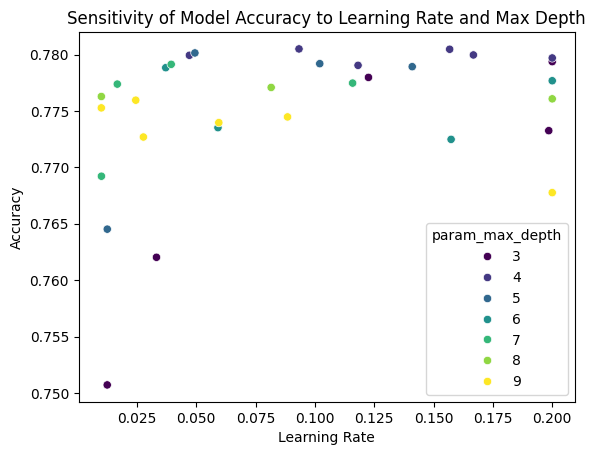

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the optimization results
opt_results = pd.DataFrame(bayes_search.cv_results_)

# Plot the sensitivity of accuracy to key hyperparameters (e.g., learning rate and max depth)
sns.scatterplot(x='param_learning_rate', y='mean_test_score', hue='param_max_depth', data=opt_results, palette="viridis", legend='full')
plt.title('Sensitivity of Model Accuracy to Learning Rate and Max Depth')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()


**Full Sensitivity Analysis Across Multiple Hyperparameters**

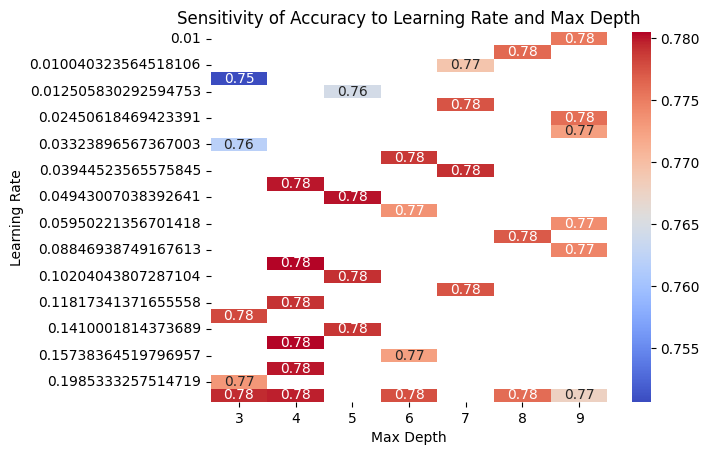

In [ ]:
# Pivot the results for plotting a heatmap
pivot_table = opt_results.pivot_table(values='mean_test_score', index='param_learning_rate', columns='param_max_depth')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Sensitivity of Accuracy to Learning Rate and Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Learning Rate')
plt.show()


**Bayesian Optimization Iterations and Convergence Plot**

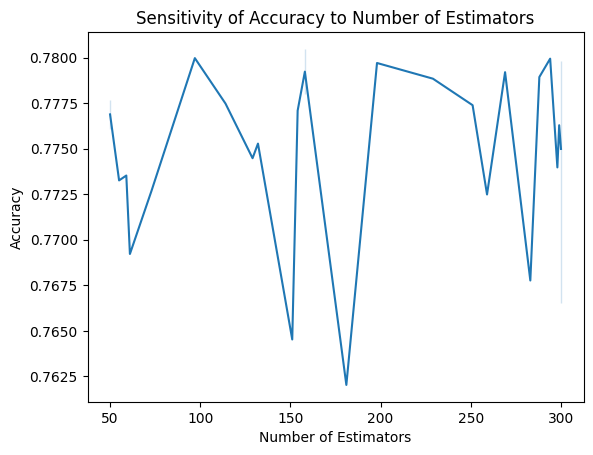

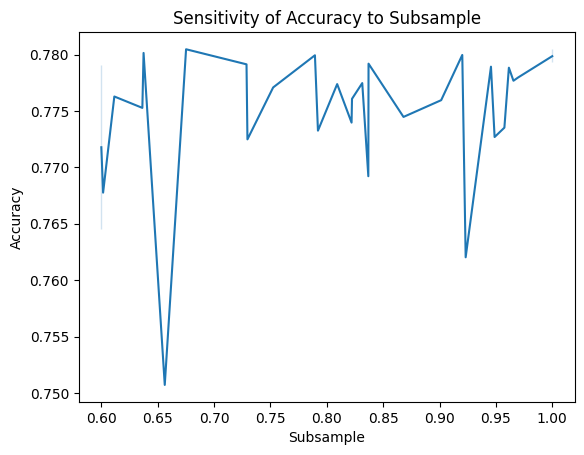

In [ ]:
# Analyze 'n_estimators' vs 'mean_test_score'
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=opt_results)
plt.title('Sensitivity of Accuracy to Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

# Analyze 'subsample' vs 'mean_test_score'
sns.lineplot(x='param_subsample', y='mean_test_score', data=opt_results)
plt.title('Sensitivity of Accuracy to Subsample')
plt.xlabel('Subsample')
plt.ylabel('Accuracy')
plt.show()


**Experimenting with Different Hyperparameter Combinations**

In [ ]:
# Hyperparameter tuning for xgboost (Used in the session)

# Define the hyperparameter grid
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]

    }


# Loop through each combination of hyperparameters
for colsample_bytree in param_grid['colsample_bytree']:
  for learning_rate in param_grid['learning_rate']:
    for max_depth in param_grid['max_depth']:
      for alpha in param_grid['alpha']:
          for n_estimators in param_grid['n_estimators']:

              index = index + 1

              # Define and train the XGBoost model
              model = xgb.XGBClassifier(objective='multi:softmax',
                                       num_class=4,
                                       colsample_bytree = colsample_bytree,
                                       learning_rate = learning_rate,
                                       max_depth = max_depth,
                                       alpha = alpha,
                                       n_estimators = n_estimators)



              y = df_encoded['Approved_Flag']
              x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

              label_encoder = LabelEncoder()
              y_encoded = label_encoder.fit_transform(y)


              x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


              model.fit(x_train, y_train)


In [ ]:
#Predict on training and testing sets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


# Calculate train and test results

train_accuracy =  accuracy_score (y_train, y_pred_train)
test_accuracy  =  accuracy_score (y_test , y_pred_test)



# Include into the lists
answers_grid ['combination'].append(index)
answers_grid ['train_Accuracy'].append(train_accuracy)
answers_grid ['test_Accuracy'].append(test_accuracy)
answers_grid ['colsample_bytree'].append(colsample_bytree)
answers_grid ['learning_rate'].append(learning_rate)
answers_grid ['max_depth'].append(max_depth)
answers_grid ['alpha'].append(alpha)
answers_grid ['n_estimators'].append(n_estimators)


# Print results for this combination
print(f"Combination {index}")
print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy : {test_accuracy :.2f}")
print("-" * 30)


Combination 720
colsample_bytree: 0.9, learning_rate: 1, max_depth: 10, alpha: 100, n_estimators: 100
Train Accuracy: 0.79
Test Accuracy : 0.77
------------------------------


**-Combination 720**

**-colsample_bytree: 0.9, learning_rate: 1, max_depth: 10, alpha: 100 ,n_estimators: 100**

**-Train Accuracy: 0.79**

**-Test Accuracy : 0.77**

<Figure size 1600x1600 with 0 Axes>

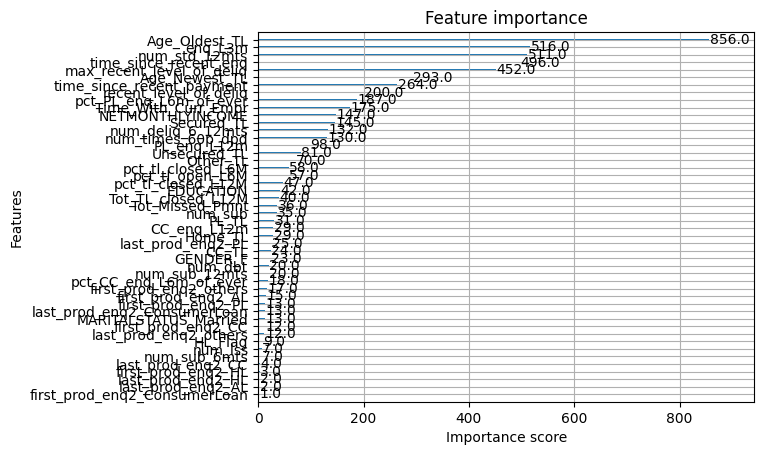

<Figure size 1600x1600 with 0 Axes>

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



# Plot feature importance
plot_importance(best_xgb)
figure(figsize=(20, 20), dpi=80)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_xgb, x, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")


Cross-validation scores: [0.78212291 0.781172   0.78236063 0.78057768 0.77722301]
Mean accuracy: 0.78


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1014
           1       0.83      0.91      0.87      5045
           2       0.48      0.31      0.37      1325
           3       0.73      0.74      0.73      1029

    accuracy                           0.78      8413
   macro avg       0.71      0.68      0.69      8413
weighted avg       0.76      0.78      0.76      8413

Confusion Matrix:
 [[ 772  242    0    0]
 [ 131 4609  250   55]
 [  34  662  410  219]
 [   0   70  202  757]]


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.79

Class p1:
Precision: 0.9072722993645563
Recall: 0.927797833935018
F1 Score: 0.9174202760590195

Class p2:
Precision: 0.7624648427512145
Recall: 0.7282051282051282
F1 Score: 0.7449412940294778

Class p3:
Precision: 0.6760828625235404
Recall: 0.7025440313111546
F1 Score: 0.6890595009596929

Class p4:
Precision: 0.8335885655946912
Recall: 0.8189568706118355
F1 Score: 0.8262079433341766

